In [ ]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'gono-unitigs:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F342174%2F722918%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240830%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240830T143106Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D944d66f98d70c8b1af3b87d19fdcd44d2c150ea71ec509ba186312c12fd1a33f7035e9bf33a7ab6d80441e3c1164194d38a4b9f50630175e8c88e48f8b0dc1de847653c441c51497fb9496ccc23997b306d27387de351a19b63a80a346860b199753161835475e06b4a1a511c404bd7e1bf67a407e4c4271b3c369d71ee12ecb2ffa06a1dd635ed2c37955bf3e5afae3f8fe663fcbc5386cf2c9eea1e27f7898e88ce21bc906b86976ea4a322a28484451e2f88424a118d971bae5da92bb366047b195d3d1bdb3f252c106d2ff6ff716ad1a42c7cba6547ab1bde011aa20c50527959024bf9ca8dad0a1345693d377a64506b049d8fb490e696e30d1cca44997,biopython-genbank:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1407797%2F2734138%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240830%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240830T143106Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D3f64b78f92a7c9051083039c359a8b4bfcf3da8089e3bc481e4f942a4bc266e870c9512b0ef087316a9db32e3c9cd6da5343f5c609528f7a9d1ddce2928fb0ca0d341196fef826827aa6c7f89ca5da088b1c8f92672aec6e56d5c139bd6e44962c99c7856b3ed4d246bb04d79184cb46940dc029fe11d098fc1d26dab33e0ea95bc2a617c1e53536a1eb9e88245574af727da8139cdcc2474bf99df18845f30ca0ed734acfe16b03267bc200a5e698e8a2e6e2e31159bbc061307dbe2dfd3ba13cb2bd5f4ab28df1680095cc1b3e1701dc250e7ce164c5065ea2aff7006e6ec49395ae04daa86d8c9f9d742c7b07aaf8180ca1ce0b3d9a7a115aeeea271a3d80'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 2331971 bytes downloaded
Downloaded and uncompressed: gono-unitigs
[==================================================] 713724 bytes downloaded
Downloaded and uncompressed: biopython-genbank
Data source import complete.


In [ ]:
try:
    import google.colab
    !pip install biopython
except ImportError:
    pass

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 13.4 MB/s eta 0:00:00


In [ ]:
# set up environment
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='whitegrid')
import time
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import cm
from tqdm import tqdm
from Bio.Seq import Seq

# Sklearn Module
from sklearn.model_selection import KFold,GroupKFold,GridSearchCV,StratifiedKFold
from sklearn.metrics import confusion_matrix,balanced_accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer,RobustScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.model_selection import learning_curve,ShuffleSplit
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE, SMOTENC, SMOTEN
from keras.models import  Sequential
from keras.layers import Dense
import keras.activations,keras.losses,keras.metrics
import os,warnings;warnings.filterwarnings("ignore")
from collections import Counter

# Machine Learning Models
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBRegressor,XGBClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
import os,warnings;warnings.filterwarnings("ignore")

In [ ]:
''' Align Metadata Target values w/ Unitig File & Compile Feature Matrix '''
class get_unitigs:

    def __init__(self,verbose=True):
        self.df = pd.read_csv('../input/gono-unitigs/metadata.csv', index_col=0) # metadata
        self.meta_names = self.df.columns
        self.target_name = None
        self.verbose = verbose

    # Get Unitig Feature matrix & Target Vector
    def get_case(self,phenotype=None):

        self.target_name = phenotype
        _metadata = self.df
        if(self.verbose):
            print(f'Target Antibiotic: {self.target_name}')
            print(f'Metadata df: {_metadata.shape}')

        # remove those that don't contain target values
        _metadata = _metadata.dropna(subset=[phenotype])
        self.metadata = _metadata.copy()

        if(self.verbose):
            print(f'Metadata df after na() removal {_metadata.shape}')
        _metadata = _metadata[phenotype] # choose target variable

        prefix = '../input/gono-unitigs/'
        suffix = '_gwas_filtered_unitigs.Rtab'

        if(self.verbose):
            print('\nCombining Metadata & Unitigs')

        # unitig feature matrix for phenotype
        tdf = pd.read_csv(prefix + phenotype + suffix, sep=" ",
                          index_col=0, low_memory=False)
        # align column data w/ metadata df (pattern_id = sample_idd)
        tdf = tdf.T
        # keep only common rows, ie. that have resistence measure]
        tdf = tdf[tdf.index.isin(_metadata.index)]

        train = tdf
        target = _metadata[_metadata.index.isin(tdf.index)]

        self.X = pd.concat([train,target],axis=1)
        if(self.verbose):
            print(f'Unitig Matrix (+target): {self.X.shape}')

In [ ]:
case_cip = get_unitigs()
display(case_cip.df.T.iloc[:,:7])

Sample_ID,ERR1549286,ERR1549290,ERR1549291,ERR1549287,ERR1549288,ERR1549299,ERR1549292
Year,2015.0,2015.0,2015.0,2015.0,2015.0,2015.0,2015.0
Country,UK,UK,UK,UK,UK,UK,UK
Continent,Europe,Europe,Europe,Europe,Europe,Europe,Europe
Beta.lactamase,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Azithromycin,>256,>256,>256,>256,>256,>256,>256
Ciprofloxacin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ceftriaxone,0.016,0.004,0.006,0.006,0.008,0.012,0.023
Cefixime,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tetracycline,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Penicillin,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
case_cip.get_case(phenotype='cip_sr')
case_cip.X.iloc[:,:2].head()

Target Antibiotic: cip_sr
Metadata df: (3786, 30)
Metadata df after na() removal (3088, 30)

Combining Metadata & Unitigs
Unitig Matrix (+target): (3088, 8874)


,ACGTTTATGCCGTTATCGATCCGATAGCCGGT,CATCTGCACCCTGTCGGCACTCGCCGCCTGAACCACCCCGTCCGGACAAGG
SRR1661154,0,0
SRR1661156,0,0
SRR1661157,0,0
SRR1661158,0,0
SRR1661159,0,0


In [ ]:
''' Ciprofloxacin '''
case = get_unitigs()
case.get_case('cip_sr')
print(case.X[case.target_name].value_counts())

Target Antibiotic: cip_sr
Metadata df: (3786, 30)
Metadata df after na() removal (3088, 30)

Combining Metadata & Unitigs
Unitig Matrix (+target): (3088, 8874)
cip_sr
0.0    1660
1.0    1428
Name: count, dtype: int64


In [ ]:
''' Azithromycin '''
case = get_unitigs()
case.get_case('azm_sr')
print(case.X[case.target_name].value_counts())

Target Antibiotic: azm_sr
Metadata df: (3786, 30)
Metadata df after na() removal (3478, 30)

Combining Metadata & Unitigs
Unitig Matrix (+target): (3478, 516)
azm_sr
0.0    3031
1.0     447
Name: count, dtype: int64


In [ ]:
''' Cefixime '''
case = get_unitigs()
case.get_case('cfx_sr')
print(case.X[case.target_name].value_counts())

Target Antibiotic: cfx_sr
Metadata df: (3786, 30)
Metadata df after na() removal (3401, 30)

Combining Metadata & Unitigs
Unitig Matrix (+target): (3401, 385)
cfx_sr
0.0    3396
1.0       5
Name: count, dtype: int64


In [ ]:
lst_azm = ['Year','Continent','Beta.lactamase','azm_mic','Azithromycin','azm_sr']
lst_cip = ['Year','Continent','Beta.lactamase','cip_mic','Ciprofloxacin','cip_sr']
lst_cfx = ['Year','Continent','Beta.lactamase','cfx_mic','Cefixime','cfx_sr']
lst_tet = ['Year','Continent','Beta.lactamase','tet_mic','Tetracycline','tet_sr']
lst_pen = ['Year','Continent','Beta.lactamase','pen_mic','Penicillin','pen_sr']
lst_antibio = [lst_azm,lst_cip,lst_cfx,lst_tet,lst_pen]
def plot_pp(lst,colour='ghostwhite'):
    tdf = get_unitigs().df[lst]
    tdf.dropna(inplace=True)
    tdf.sort_values(by=lst[-3],inplace=True,ascending=False)
    tdf['Year'] = tdf['Year'].astype(str)
    fig = px.parallel_categories(tdf)
    fig.update_traces(patch={"line": {"color":colour,'shape':'hspline'}})
    fig.update_layout(title=f'Bacteria Resistance to {lst[-2]}')
    fig.update_layout(margin=dict(t=60,b=10),height=400)
    fig.show()

In [ ]:
for i in lst_antibio:
    plot_pp(i,'steelblue')

In [ ]:
# For the purposes of plotting; require standard codes for plotly chloropeth
country_map = {'UK':'GBR','Canada':'CAN','France':'FRA','Spain':'SPA','Austria':'AUT',
               'Italy':'ITA','Slovakia':'SVK','Norway':'NWY','Slovenia':'SVN',
               'Hungary':'HUN','The Netherlands':'NED','Belgium':'BEL','Greece':'GRC',
               'Sweden':'SWE','Denmark':'DNK','Germany':'GER','Latvia':'LAT',
               'Iceland':'ICL','Cyprus':'CYP','Malta':'MLT','Portugal':'PRT',
               'Brasil':'BRA','Chile':'CHL','Ecuador':'ECU','USA':'USA','Australia':'AUS',
               'Caribbean':'XXX','Cuba':'CUB','Poland':'POL','Romania':'ROU',
               'Russia':'RUS','Turkey':'TUR','Jamaica':'JAM','Lithuania':'LTU',
               'Scotland':'SCO','Argentina':'ARG','Thailand':'THA','Japan':'JPN',
               'New_Zealand':'NZL','India':'IND','China':'CHN','Indonesia':'IDN',
               'Philippines':'PHL','Vietnam':'VNM','Pakistan':'PAK','Bhutan':'BTN',
               'Estonia':'EST','Belarus':'BLR','Armenia':'ARM','Bulgaria':'BUL',
               'Finland':'FIN','HongKong':'HKG','Malaysia':'MYS','Gambia':'GMB',
               'South_Africa':'ZAF','Tanzania':'TZA','CaboVerde':'CPV','Marocko':'MAR',
               'Uganda':'UGA','Angola':'AGO','Guinea':'GIN','GuineaBissau':
               'GNB','Saudi_Arabia':'SAU','Ivory_Coast':'CIV','Ireland':'IRL'}

In [ ]:
lst_azm = ['Year','Country','Continent','Beta.lactamase','azm_mic','Azithromycin','azm_sr']
lst_cip = ['Year','Country','Continent','Beta.lactamase','cip_mic','Ciprofloxacin','cip_sr']
lst_cfx = ['Year','Country','Continent','Beta.lactamase','cfx_mic','Cefixime','cfx_sr']
lst_tet = ['Year','Country','Continent','Beta.lactamase','tet_mic','Tetracycline','tet_sr']
lst_pen = ['Year','Country','Continent','Beta.lactamase','pen_mic','Penicillin','pen_sr']
lst_antibio = [lst_azm,lst_cip,lst_cfx,lst_tet,lst_pen]

def plot_geomean(lst):

    global country_map

    tdf = get_unitigs().df[lst]
    tdf.dropna(inplace=True)
    tdf.sort_values(by=lst[-3],inplace=True,ascending=False)
    tdf['Year'] = tdf['Year'].astype(str)

    tdf['Country'] = tdf['Country'].map(country_map)
    tdf2 = tdf.groupby(['Country']).mean()

    fig = go.Figure(data=go.Choropleth(
        locations = tdf2.index,
        z = tdf2[lst[-1]],
        colorscale = 'magenta',
        autocolorscale=False,
        reversescale=False,
        marker_line_color='black',
        marker_line_width=0.5,
        colorbar_title = f'{lst[-1]}'))

    fig.update_layout(title=f'Bacteria Resistance to {lst[-2]}',
                      geo=dict(showframe=False,showcoastlines=False,
                               projection_type='equirectangular'))
    fig.update_layout(margin=dict(t=60,b=10),height=400)
    fig.show()

In [ ]:
# Plot Choropleth Map
for i in lst_antibio:
    plot_geomean(i)

In [ ]:
def get_mic():

    lst_cases = ['azm_mic','cip_mic','cfx_mic']
    rtabs = ['azm_sr','cip_sr','cfx_sr']
    lst_temp = []

    ii=-1
    for case in lst_cases:

        ii+=1
        case_id = get_unitigs(verbose=False)
        case_id.get_case(rtabs[ii])

        X_all = pd.concat([case_id.X,case_id.metadata],axis=1)

        new_df = X_all[case].value_counts().rename_axis(case).reset_index(name='counts')
        new_df = new_df.rename(columns={new_df.columns[0]: 'mic'})
        new_df['case'] = case
        lst_temp.append(new_df)

    X_counts = pd.concat([lst_temp[0],lst_temp[1],lst_temp[2]],axis=0)
    X_counts.sort_values(by='mic',inplace=True,ascending=True)
    X_counts['mic'] = X_counts['mic'].astype(str)

    fig = px.bar(X_counts, x='mic',y='counts',color='case')
    fig.update_layout(template='plotly_white',height=300)
    fig.show()

In [ ]:
get_mic()

In [ ]:
lab=LabelEncoder()
data=pd.read_csv('/kaggle/input/gono-unitigs/metadata.csv')
print(data.columns)
print(data.info())
print(data.isna().sum())
print(data.describe())

Index(['Sample_ID', 'Year', 'Country', 'Continent', 'Beta.lactamase',
       'Azithromycin', 'Ciprofloxacin', 'Ceftriaxone', 'Cefixime',
       'Tetracycline', 'Penicillin', 'NG_MAST', 'Group', 'azm_mic', 'cip_mic',
       'cro_mic', 'cfx_mic', 'tet_mic', 'pen_mic', 'log2_azm_mic',
       'log2_cip_mic', 'log2_cro_mic', 'log2_cfx_mic', 'log2_tet_mic',
       'log2_pen_mic', 'azm_sr', 'cip_sr', 'cro_sr', 'cfx_sr', 'tet_sr',
       'pen_sr'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786 entries, 0 to 3785
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sample_ID       3786 non-null   object 
 1   Year            3536 non-null   float64
 2   Country         3785 non-null   object 
 3   Continent       3785 non-null   object 
 4   Beta.lactamase  1927 non-null   object 
 5   Azithromycin    3480 non-null   object 
 6   Ciprofloxacin   3129 non-null   object 
 7   Ceftriaxone     

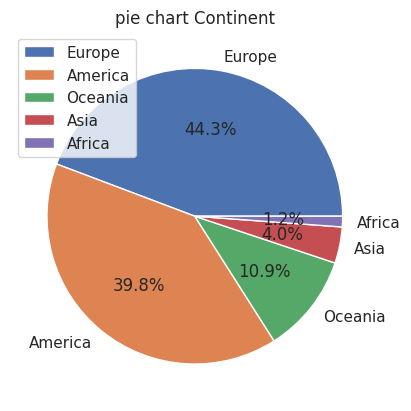

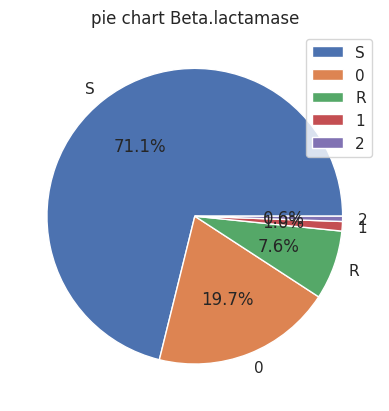

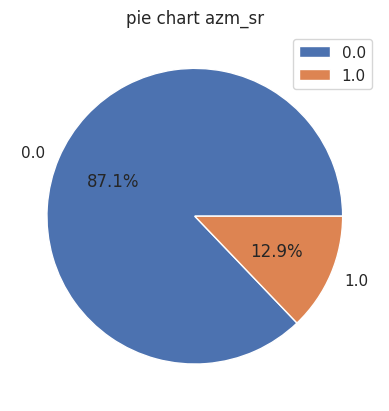

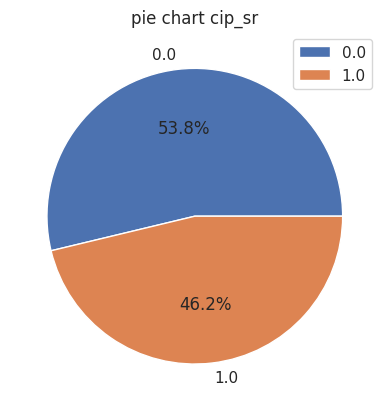

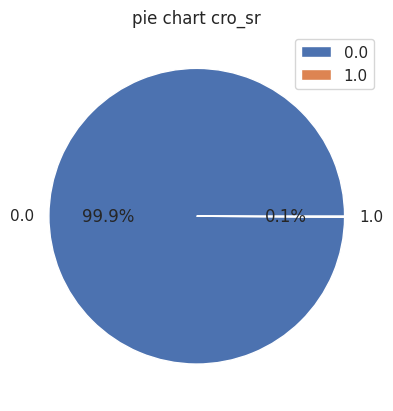

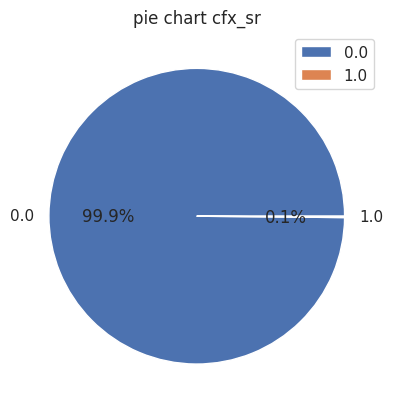

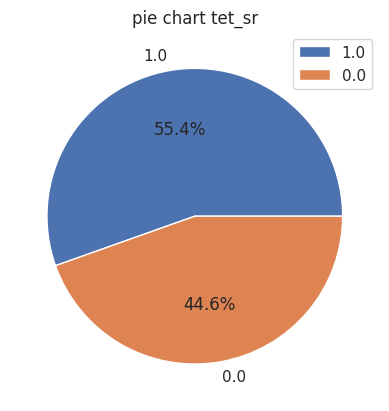

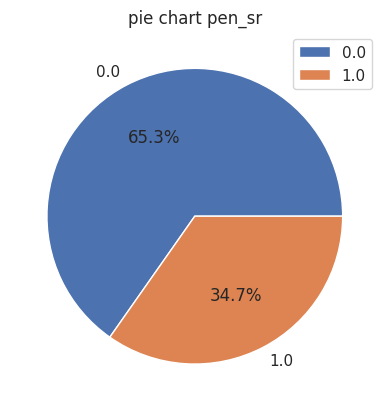

In [ ]:
for i in data.columns.values:
    if len(data[i].value_counts()) <=10:
        indexs=data[i].value_counts().index
        value=data[i].value_counts().values
        plt.pie(value,labels=indexs,autopct='%1.1f%%')
        plt.title(f"pie chart {i}")
        plt.legend()
        plt.show()

In [ ]:
for i in data.columns.values:
    data[i]=lab.fit_transform(data[i])

print(data)

      Sample_ID  Year  Country  Continent  Beta.lactamase  Azithromycin  \
0          2651    27       61          3               5            29   
1          2655    27       61          3               5            29   
2          2656    27       61          3               5            29   
3          2652    27       61          3               5            29   
4          2653    27       61          3               5            29   
...         ...   ...      ...        ...             ...           ...   
3781       2761    28       61          3               5            29   
3782       2762    28       61          3               5            29   
3783       2763    28       61          3               5            29   
3784       2764    27       61          3               5            29   
3785       2765    26       61          3               5            12   

      Ciprofloxacin  Ceftriaxone  Cefixime  Tetracycline  ...  log2_cro_mic  \
0                45 

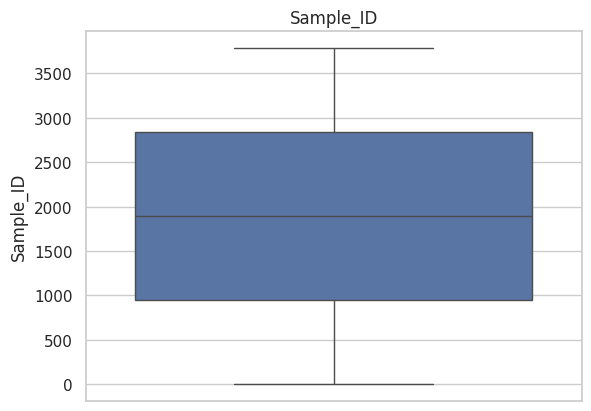

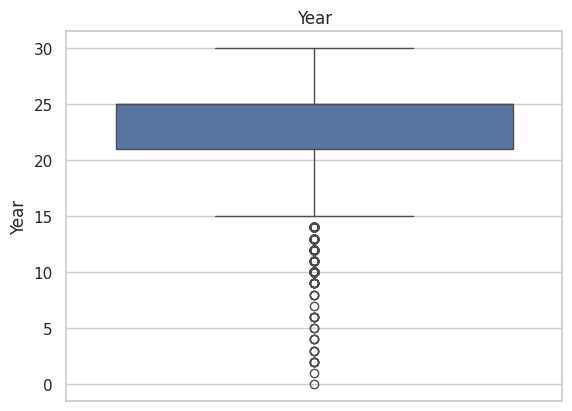

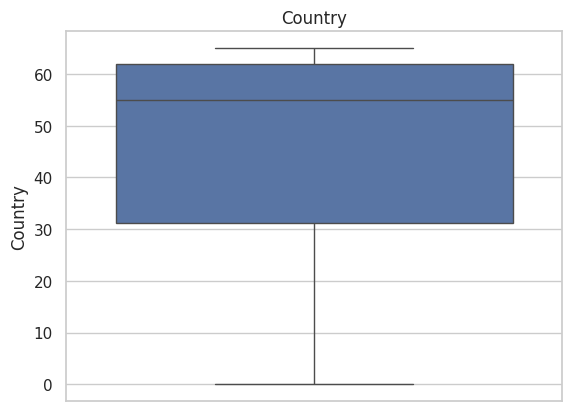

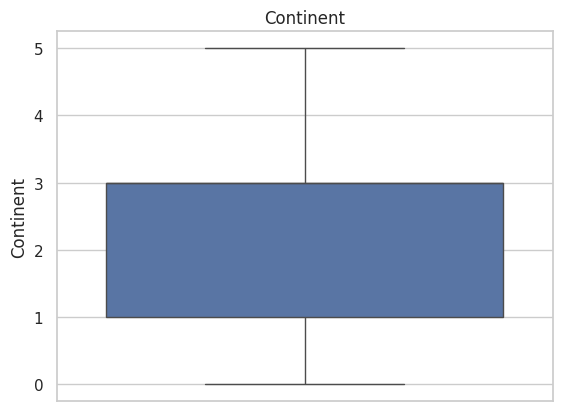

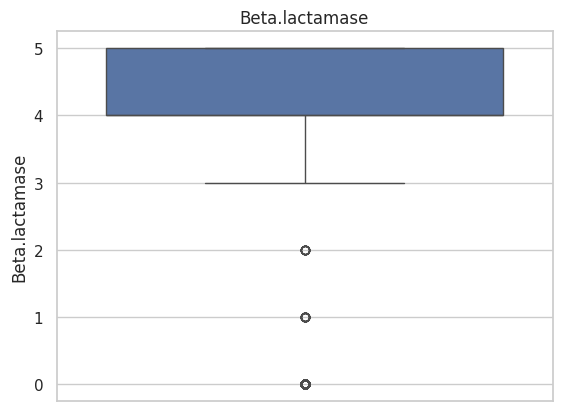

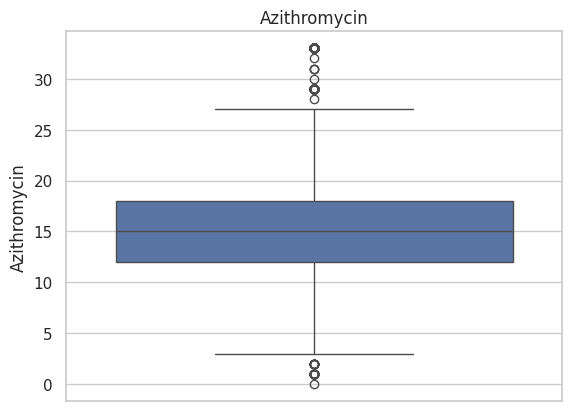

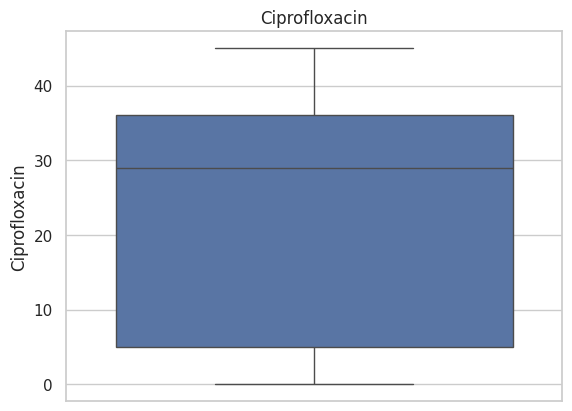

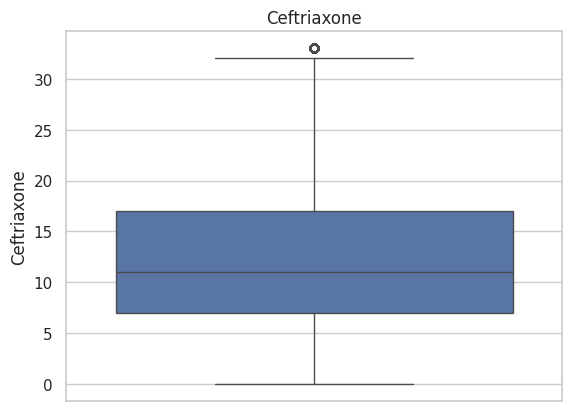

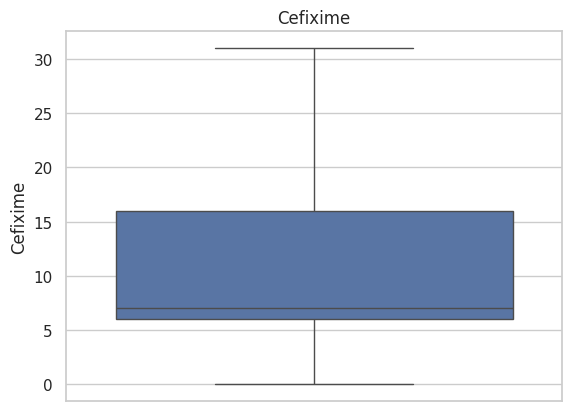

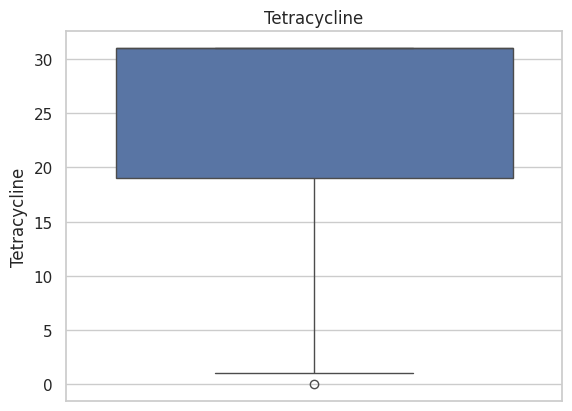

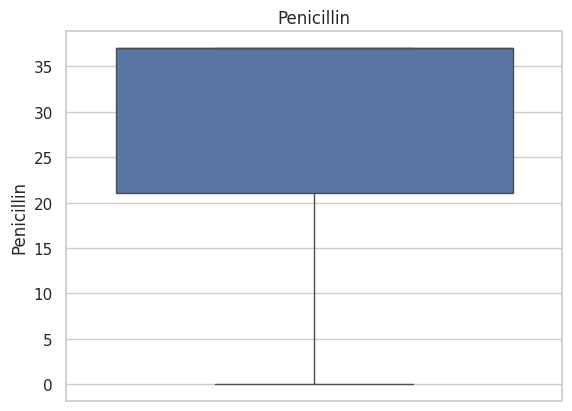

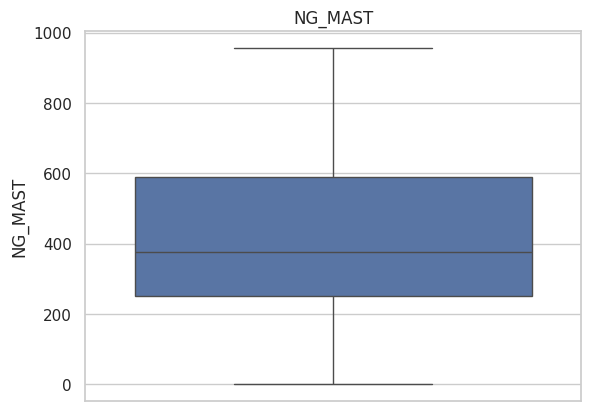

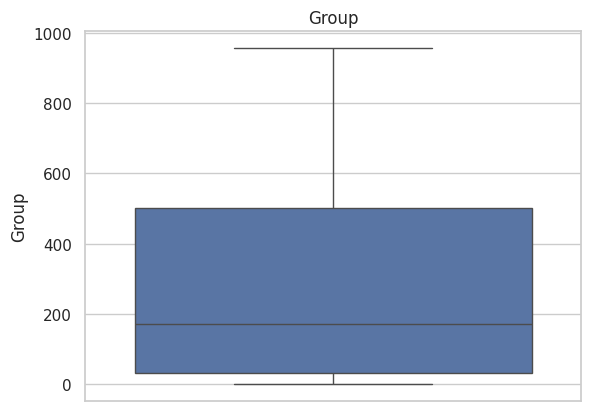

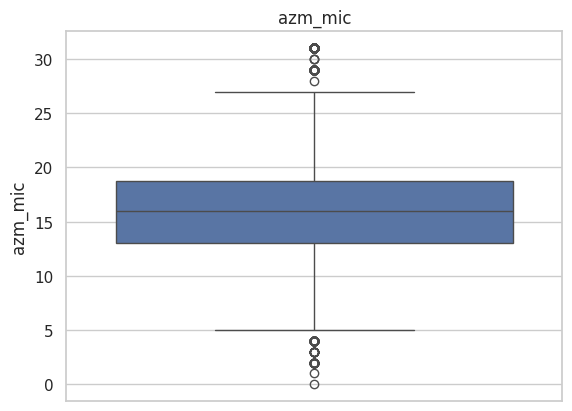

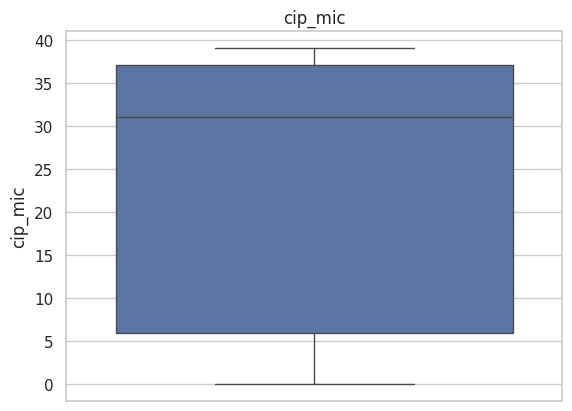

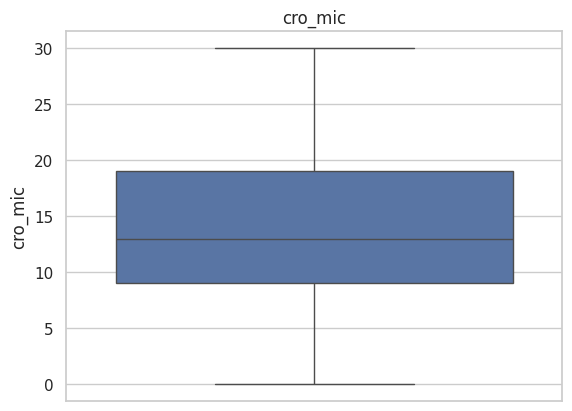

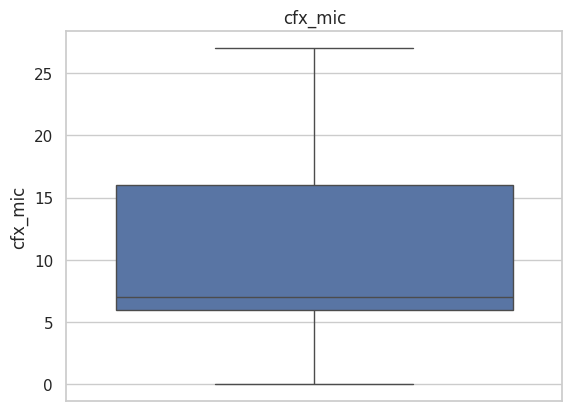

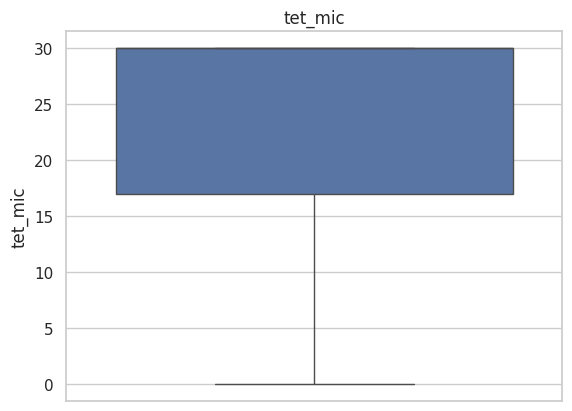

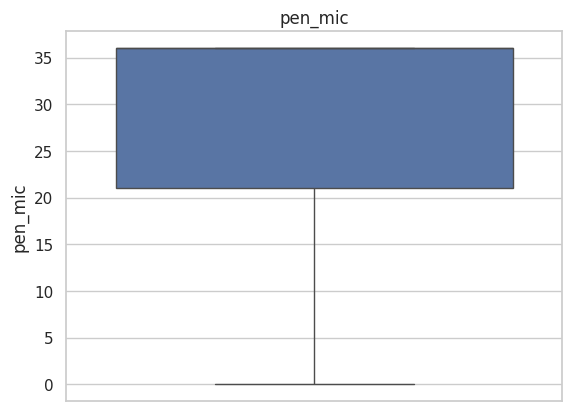

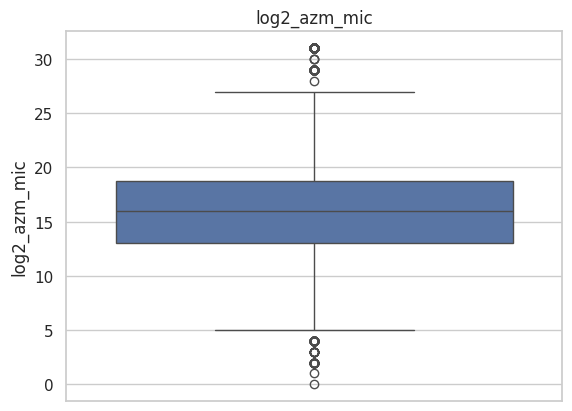

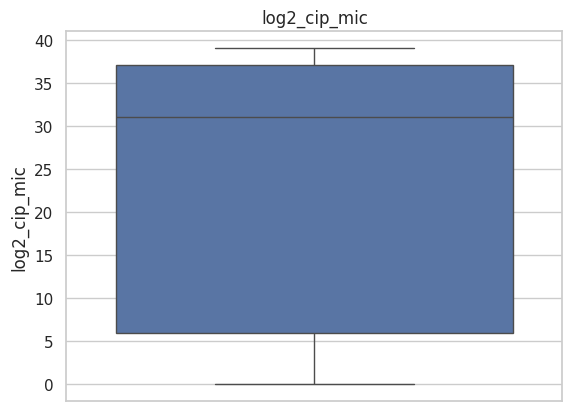

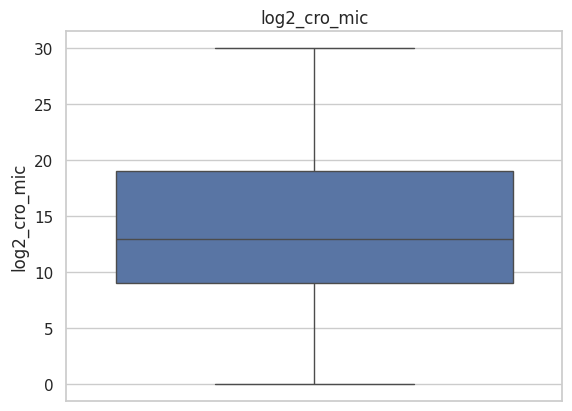

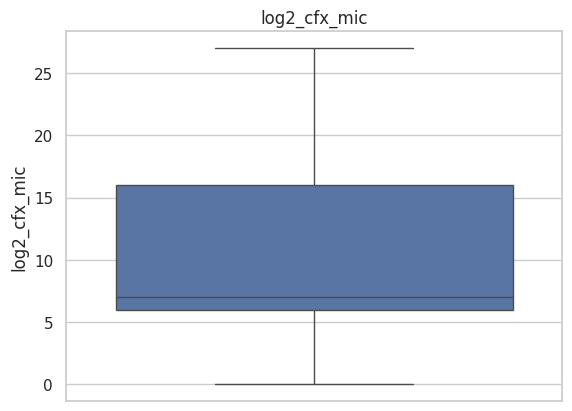

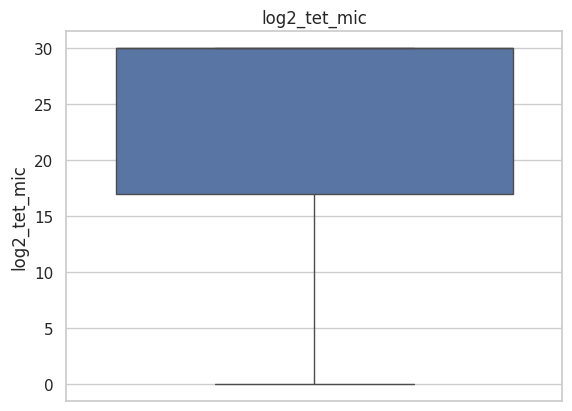

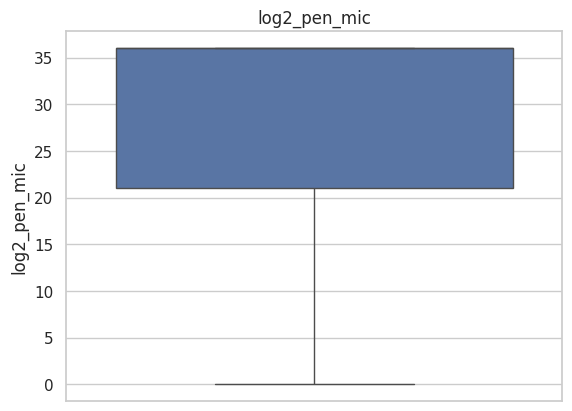

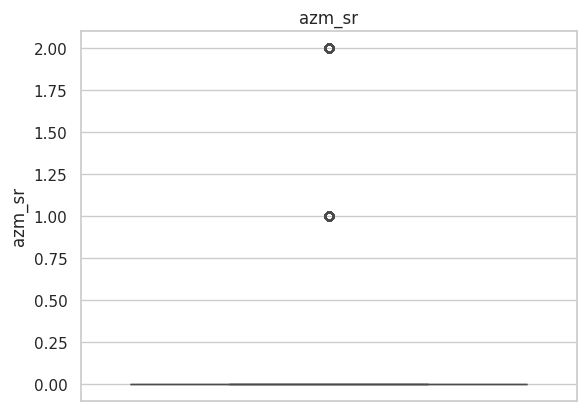

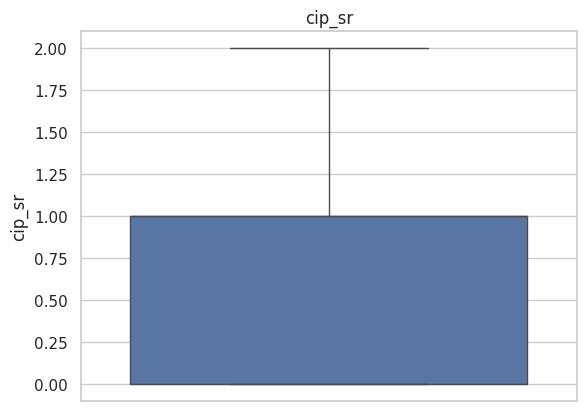

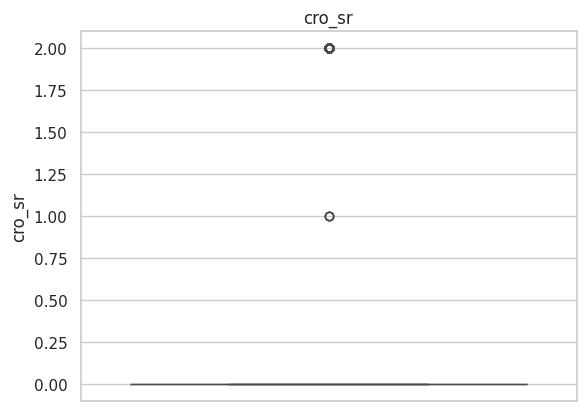

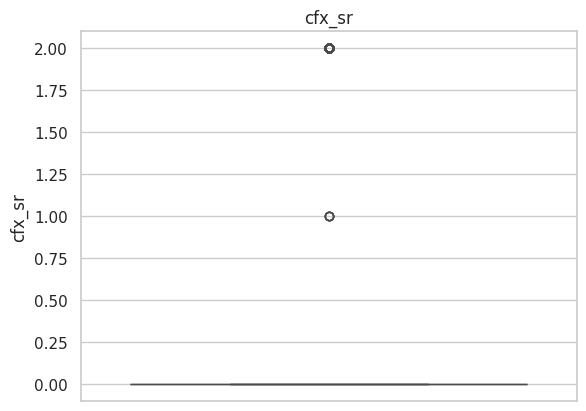

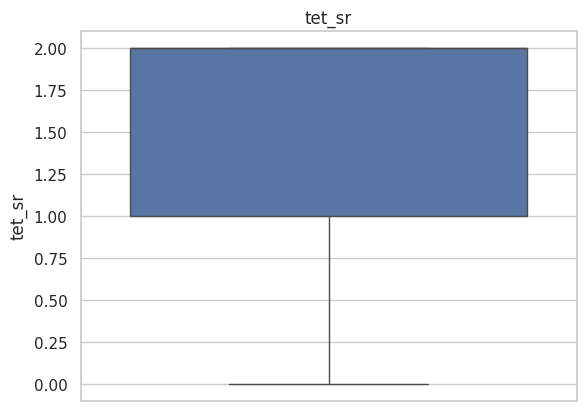

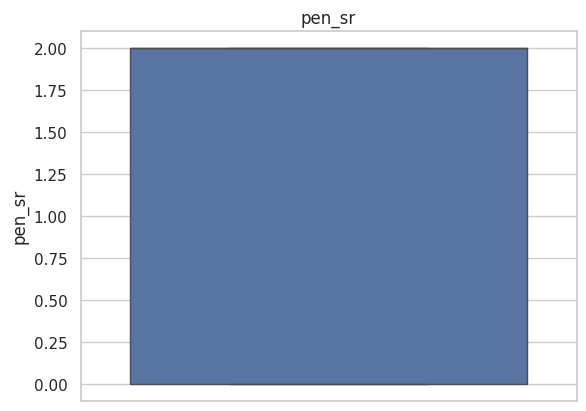

In [ ]:
for i in data.columns.values:
    sns.boxplot(data[i])
    plt.title(f'{i}')
    plt.show()

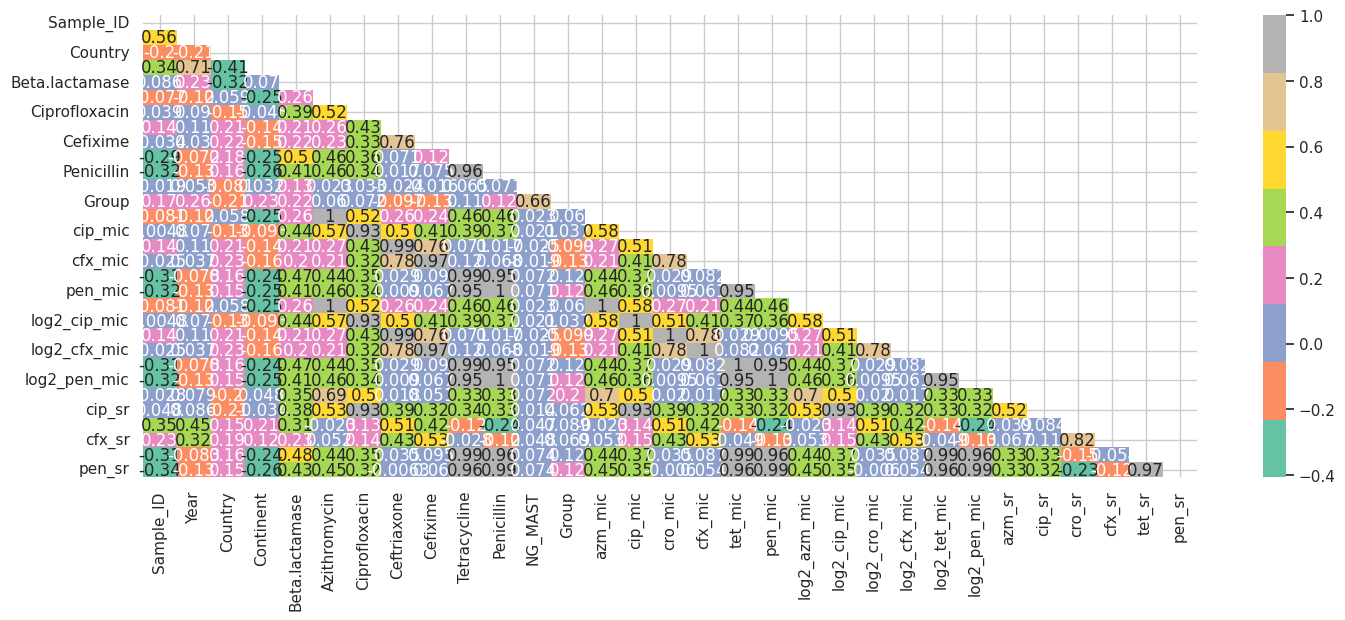

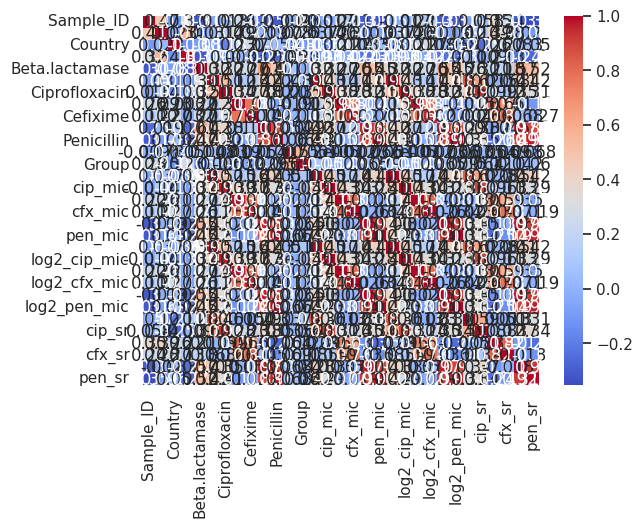

In [ ]:
plt.figure(figsize=(17, 6))
corr = data.corr(method='spearman')
my_m = np.triu(corr)
sns.heatmap(corr, mask=my_m, annot=True, cmap="Set2")
plt.show()

correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# models use in kfold
models = []
models.append(
    ('LDA', LinearDiscriminantAnalysis()))

# models use in gscv
cv_lda = {'solver':
              ['svd', 'lsqr', 'eigen']}

models = []
models.append(
    ('LDA', LinearDiscriminantAnalysis(),cv_lda))

In [ ]:
class class_eval():

    def __init__(self,data=None,models=None,nfold = 4,
                 gsfold=3, verbose=True,
                 shuffle_id=False,random_state=22):

        self.shuffle = shuffle_id

        if(self.shuffle is False):
            self.rs = None
        else:
            self.rs = random_state # random state

        if(data is not None):
            X_all = data.X
            self.y = data.X[data.target_name].copy()
            self.X = data.X.drop([data.target_name],axis=1).copy()
        else:
            print('input case data')

        self.models = models # Tuple /w (name,model)
        self.nfold = nfold       # number of cross validation folds
        self.gsfold = gsfold    # number of grid search folds in every fold
        self.target_name = data.target_name  # target name

    ''' Grid-Search Standard Kfold Cross Validation '''
    # For each fold, a grid search cv is applied to find best params

    def gscv(self,type_id='kfold'):

        self.store_models = {} # Store models of Kfolds
        self.dic_tr = {}
        self.dic_te = {}

        for model in self.models:

            if(type_id is 'skfold'):
                kfold = StratifiedKFold(n_splits=self.nfold,
                                        shuffle=self.shuffle,
                                        random_state=self.rs)
            elif(type_id is 'kfold'):
                kfold = KFold(n_splits=self.nfold,
                              shuffle=self.shuffle,
                              random_state=self.rs)

            lst_temp = []; lst_temp2 = []; kfold_id = -1
            for train_index, test_index in kfold.split(self.X,self.y):

                kfold_id+=1;print(f'\nkfold {kfold_id}')
                # split data into train/test sets
                X_train = self.X.iloc[train_index]
                y_train = self.y[train_index]
                X_test = self.X.iloc[test_index]
                y_test = self.y[test_index]

                # perform grid search to identify best hyper-parameters
                gs_clf = GridSearchCV(model[1],param_grid=model[2],
                                      cv=self.gsfold, n_jobs=-1,
                                      scoring='balanced_accuracy')

                # Train using the best model
                gs_clf.fit(X_train, y_train)
                best_model = gs_clf.best_estimator_ # best cv model
                self.store_models[f'GS_{model[0]}_{kfold_id}'] = best_model

                # Predict using best model
                ym_tr = gs_clf.predict(X_train)
                ym_te = gs_clf.predict(X_test)
                score_tr = balanced_accuracy_score(y_train,ym_tr)
                score_te = balanced_accuracy_score(y_test,ym_te)
                lst_temp.append(score_tr); lst_temp2.append(score_te)

                print(f'Train Score: {round(score_tr,4)} - Test Score: {round(score_te,4)}')
                print('Best hyperparameters for this fold')
                print(gs_clf.best_params_)
                print(f"Test : Confusion matrix Fold {kfold_id}")
                print(confusion_matrix(y_test, ym_te))

            self.dic_tr[model[0]] = lst_temp
            self.dic_te[model[0]] = lst_temp2
            test_mean = round(sum(lst_temp2)/len(lst_temp2),4)
            print(f'\n {model[0]} - Test Mean Score: {test_mean}')

    '''K-Fold Cross Validation'''
    # w/ type_id option; statified used to make sure classes are balanced in folds

    def cv(self,type_id='kfold'):

        print(f'type_id set to: {type_id}')
        self.store_models = {} # Store models of Kfolds
        self.dic_tr = {}
        self.dic_te = {}

        # Cycle though all tuple model settings
        for model in self.models:

            t0 = time.time()
            if(type_id is 'skfold'):
                kfold = StratifiedKFold(n_splits=self.nfold,
                                        shuffle=self.shuffle,
                                        random_state=self.rs)
            elif(type_id is 'kfold'):
                kfold = KFold(n_splits=self.nfold,
                              shuffle=self.shuffle,
                              random_state=self.rs)

            lst_temp = []; lst_temp2 = []; kfold_id = -1
            for train_index, test_index in kfold.split(self.X,self.y):

                kfold_id+=1
                # split data into train/test sets
                X_train = self.X.iloc[train_index]
                y_train = self.y[train_index]
                X_test = self.X.iloc[test_index]
                y_test = self.y[test_index]

                # Fit, Stopre & Predict Kfold models
                model[1].fit(X_train, y_train)
                self.store_models[f'{model[0]}_{kfold_id}'] = model[1]
                ym_tr = model[1].predict(X_train)
                ym_te = model[1].predict(X_test)

                score_tr = balanced_accuracy_score(y_train,ym_tr)
                score_te = balanced_accuracy_score(y_test,ym_te)
                lst_temp.append(score_tr); lst_temp2.append(score_te)

            self.dic_tr[model[0]] = lst_temp
            self.dic_te[model[0]] = lst_temp2
            test_mean = round(sum(lst_temp2)/len(lst_temp2),4)
            print(f'{model[0]} - Test Mean Score: {test_mean} - Total Time: {round(time.time() - t0,4)}')

    ''' unitig visual functions only '''

    def col_trans(self,sel_id=0):

        # unitig to abrev
        if(sel_id is 0):
            self.X_names = self.X.columns.tolist()
            temp_names = self.X_names.copy()

            unitigs = self.X_names.copy()
            del unitigs[-1]

            lst_abr = []
            ii=-1
            for unitig in range(0,len(unitigs)):
                ii+=1;lst_abr.append(f'u{ii}')
            lst_abr.append(self.target_name)
            self.X.columns = lst_abr
            self.dicabr = dict(zip(lst_abr,self.X_names))

        # abreb to unitig
        elif(sel_id is 1):
            self.X.columns = self.X_names

    ''' PLOT KFOLD RESULTS '''

    def fold_plot(self):

        df_tr = pd.DataFrame(self.dic_tr)
        df_te = pd.DataFrame(self.dic_te)

        # Make Plots
        fig,ax = plt.subplots(2,2,figsize=(14,6))
        sns.stripplot(data=df_tr, orient='h',linewidth=1,ax=ax[0,0])
        sns.heatmap(data=df_tr,annot=True,cbar=False,cmap="plasma_r",
                    vmax=1,vmin=0.5,ax=ax[0,1])
        sns.stripplot(data=df_te, orient='h',linewidth=1,ax=ax[1,0])
        sns.heatmap(data=df_te,annot=True,cbar=False,cmap="plasma_r",
                    vmax=1,vmin=0.5,fmt='.3g',ax=ax[1,1])
        ax[0,0].set_xlim([0.5,1.1]);ax[1,0].set_xlim([0.5,1.1])
        ax[0,0].set_title('train kfold')
        ax[0,1].set_title('train kfold heatmap')
        ax[1,0].set_title('test kfold')
        ax[1,1].set_title('test kfold heatmap')
        sns.despine(bottom=True, left=True)
        plt.tight_layout()

In [ ]:
''' Define Models used for Testing '''
models = []
n_est = 10

# Unsupervised Learning Models
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))

# # Supervised Learning Models
models.append(('SVC',SVC()))
models.append(('TREE', DecisionTreeClassifier())) # Supervised Model
models.append(('GBM', GradientBoostingClassifier(n_estimators=n_est)))

# Desirable for Feature Importance Evaluation
models.append(('XGB',XGBClassifier(n_estimators=n_est,verbosity = 0)))
models.append(('RF', RandomForestClassifier(n_estimators=n_est)))

In [ ]:
# Get case; (Dataset Feature Class)
case = get_unitigs()
case.get_case('cip_sr')

# Standard KFOLD evaluation
eval1 = class_eval(data=case, # input the case class
                   nfold = 4, # 4 fold kfold
                   models=models) # global models tuple list)

# Evaluate kfold using selected models
eval1.cv(type_id='kfold')  # standard kfold evaluation

Target Antibiotic: cip_sr
Metadata df: (3786, 30)
Metadata df after na() removal (3088, 30)

Combining Metadata & Unitigs
Unitig Matrix (+target): (3088, 8874)
type_id set to: kfold
LDA - Test Mean Score: 0.6707 - Total Time: 133.2838
KNN - Test Mean Score: 0.9476 - Total Time: 24.8618
NB - Test Mean Score: 0.8172 - Total Time: 5.8171
SVC - Test Mean Score: 0.9473 - Total Time: 130.7752
TREE - Test Mean Score: 0.9537 - Total Time: 6.0705
GBM - Test Mean Score: 0.9607 - Total Time: 15.0352
XGB - Test Mean Score: 0.9661 - Total Time: 66.2668
RF - Test Mean Score: 0.9519 - Total Time: 2.0502


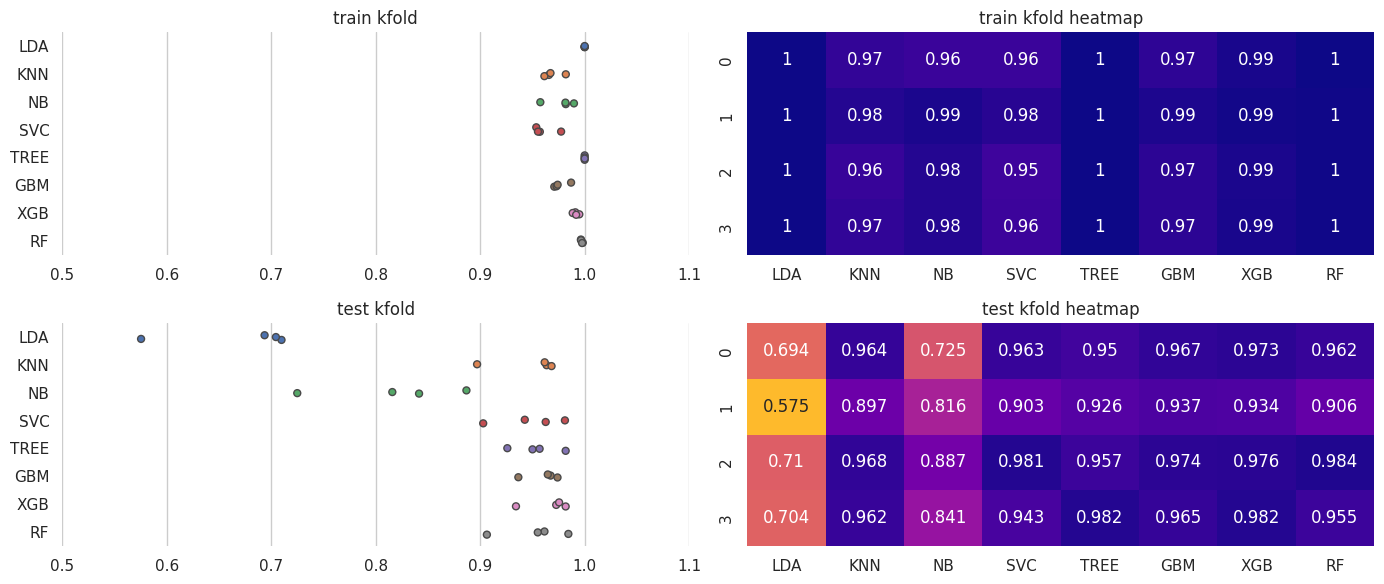

In [ ]:
eval1.fold_plot()  # plot kfold results

In [ ]:
''' Define Models used for Testing '''
models = []
models.append(('SVC',SVC(kernel = 'linear')))

# Get case; (Dataset Feature Class)
case = get_unitigs()
case.get_case('cip_sr')

# Standard KFOLD evaluation
eval_svc1 = class_eval(data=case, # input the case class
                   nfold = 4, # 4 fold kfold
                   models=models) # global models tuple list)

# Evaluate kfold using selected models
eval_svc1.cv(type_id='kfold')  # standard kfold evaluation

Target Antibiotic: cip_sr
Metadata df: (3786, 30)
Metadata df after na() removal (3088, 30)

Combining Metadata & Unitigs
Unitig Matrix (+target): (3088, 8874)
type_id set to: kfold
SVC - Test Mean Score: 0.9294 - Total Time: 54.8566


In [ ]:
svm_params = {
    'C': [0.01],
    'gamma': [1e-06, 1e-05],
    'kernel': ['linear']
}

# Define Model (just the one)
svm = SVC(class_weight='balanced')
models = []
models.append(('SVM',svm,svm_params))

# Get Dataset Features
case = get_unitigs()
case.get_case('cip_sr')

eval_svc2 = class_eval(data=case,
                   models=models)
eval_svc2.gscv()

Target Antibiotic: cip_sr
Metadata df: (3786, 30)
Metadata df after na() removal (3088, 30)

Combining Metadata & Unitigs
Unitig Matrix (+target): (3088, 8874)

kfold 0
Train Score: 0.9855 - Test Score: 0.9705
Best hyperparameters for this fold
{'C': 0.01, 'gamma': 1e-06, 'kernel': 'linear'}
Test : Confusion matrix Fold 0
[[397  14]
 [  9 352]]

kfold 1
Train Score: 0.9924 - Test Score: 0.9048
Best hyperparameters for this fold
{'C': 0.01, 'gamma': 1e-06, 'kernel': 'linear'}
Test : Confusion matrix Fold 1
[[373  65]
 [ 14 320]]

kfold 2
Train Score: 0.9849 - Test Score: 0.9725
Best hyperparameters for this fold
{'C': 0.01, 'gamma': 1e-06, 'kernel': 'linear'}
Test : Confusion matrix Fold 2
[[445   0]
 [ 18 309]]

kfold 3
Train Score: 0.9868 - Test Score: 0.9609
Best hyperparameters for this fold
{'C': 0.01, 'gamma': 1e-06, 'kernel': 'linear'}
Test : Confusion matrix Fold 3
[[359   7]
 [ 24 382]]

 SVM - Test Mean Score: 0.9522


In [ ]:
eval_svc2.store_models

{'GS_SVM_0': SVC(C=0.01, class_weight='balanced', gamma=1e-06, kernel='linear'),
 'GS_SVM_1': SVC(C=0.01, class_weight='balanced', gamma=1e-06, kernel='linear'),
 'GS_SVM_2': SVC(C=0.01, class_weight='balanced', gamma=1e-06, kernel='linear'),
 'GS_SVM_3': SVC(C=0.01, class_weight='balanced', gamma=1e-06, kernel='linear')}

Epoch 1/100
76/76 [==============================] - 6s 23ms/step - loss: 1.0572 - accuracy: 0.5932 - val_loss: 1.0174 - val_accuracy: 0.6165
Epoch 2/100
76/76 [==============================] - 1s 11ms/step - loss: 0.9933 - accuracy: 0.6096 - val_loss: 0.9664 - val_accuracy: 0.6165
Epoch 3/100
76/76 [==============================] - 0s 4ms/step - loss: 0.9555 - accuracy: 0.6096 - val_loss: 0.9342 - val_accuracy: 0.6165
Epoch 4/100
76/76 [==============================] - 0s 4ms/step - loss: 0.9238 - accuracy: 0.6096 - val_loss: 0.8966 - val_accuracy: 0.6165
Epoch 5/100
76/76 [==============================] - 0s 3ms/step - loss: 0.8813 - accuracy: 0.6096 - val_loss: 0.8445 - val_accuracy: 0.6165
Epoch 6/100
76/76 [==============================] - 0s 5ms/step - loss: 0.8224 - accuracy: 0.6096 - val_loss: 0.7769 - val_accuracy: 0.6165
Epoch 7/100
76/76 [==============================] - 0s 4ms/step - loss: 0.7499 - accuracy: 0.6096 - val_loss: 0.6994 - val_accuracy: 0.6165
Epoch 8/100

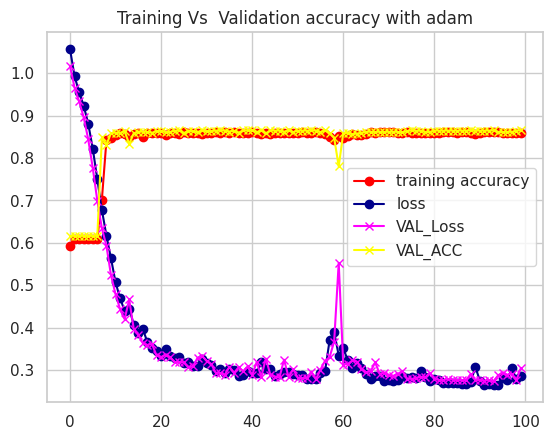

Epoch 1/75
76/76 [==============================] - 1s 6ms/step - loss: 1.0616 - accuracy: 0.5256 - val_loss: 1.0203 - val_accuracy: 0.6165
Epoch 2/75
76/76 [==============================] - 0s 3ms/step - loss: 0.9958 - accuracy: 0.6096 - val_loss: 0.9670 - val_accuracy: 0.6165
Epoch 3/75
76/76 [==============================] - 0s 4ms/step - loss: 0.9558 - accuracy: 0.6096 - val_loss: 0.9357 - val_accuracy: 0.6165
Epoch 4/75
76/76 [==============================] - 0s 4ms/step - loss: 0.9342 - accuracy: 0.6096 - val_loss: 0.9187 - val_accuracy: 0.6165
Epoch 5/75
76/76 [==============================] - 0s 4ms/step - loss: 0.9214 - accuracy: 0.6096 - val_loss: 0.9071 - val_accuracy: 0.6165
Epoch 6/75
76/76 [==============================] - 0s 4ms/step - loss: 0.9124 - accuracy: 0.6096 - val_loss: 0.8974 - val_accuracy: 0.6165
Epoch 7/75
76/76 [==============================] - 0s 3ms/step - loss: 0.9033 - accuracy: 0.6096 - val_loss: 0.8871 - val_accuracy: 0.6165
Epoch 8/75
76/76 [==

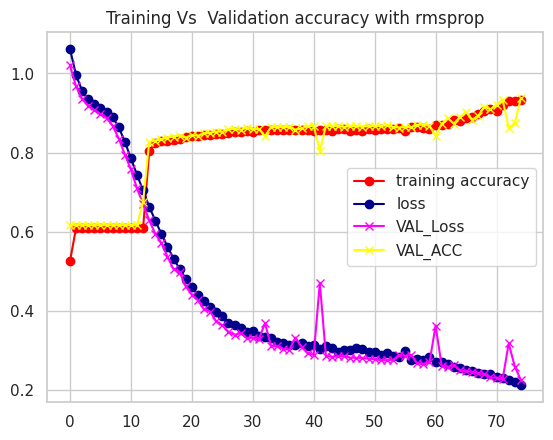

In [ ]:
X = data[['Tetracycline', 'Penicillin', 'azm_mic', 'tet_sr', 'log2_tet_mic', 'log2_pen_mic',
          'tet_mic', 'pen_mic', 'Beta.lactamase', 'Azithromycin', 'cip_mic',
          'log2_azm_mic', 'log2_cip_mic', 'cip_sr', 'Ciprofloxacin']]

Y =pd.get_dummies(data['pen_sr'])
x_Train,x_Test,y_Train,y_Test=train_test_split(X,Y,test_size=0.5)

models=Sequential()
models.add(Dense(units=X.shape[1],input_dim=X.shape[1],activation=keras.activations.relu))
models.add(Dense(units=X.shape[1],activation=keras.activations.tanh))
models.add(Dense(units=X.shape[1],activation=keras.activations.sigmoid))
models.add(Dense(units=X.shape[1],activation=keras.activations.softmax))
models.add(Dense(units=X.shape[1],activation=keras.activations.softmax))
models.add(Dense(units=Y.shape[1],activation=keras.activations.softmax))
models.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics='accuracy')
histo=models.fit(x_Train,y_Train,batch_size=25,epochs=100,validation_data=(x_Test,y_Test),validation_batch_size=35)
plt.plot(histo.history['accuracy'], label='training accuracy', marker='o', color='red')
plt.plot(histo.history['loss'], label='loss', marker='o', color='darkblue')
plt.plot(histo.history['val_loss'],label="VAL_Loss",marker='x',color='magenta')
plt.plot(histo.history['val_accuracy'],label="VAL_ACC",marker='x',color='yellow')
plt.title('Training Vs  Validation accuracy with adam')
plt.legend()
plt.show()

models1=Sequential()
models1.add(Dense(units=X.shape[1],input_dim=X.shape[1],activation=keras.activations.relu))
models1.add(Dense(units=X.shape[1],activation=keras.activations.tanh))
models1.add(Dense(units=X.shape[1],activation=keras.activations.sigmoid))
models1.add(Dense(units=X.shape[1],activation=keras.activations.softmax))
models1.add(Dense(units=X.shape[1],activation=keras.activations.softmax))
models1.add(Dense(units=Y.shape[1],activation=keras.activations.softmax))
models1.compile(optimizer='rmsprop',loss=keras.losses.categorical_crossentropy,metrics='accuracy')
hist=models1.fit(x_Train,y_Train,batch_size=25,epochs=75,validation_data=(x_Test,y_Test),validation_batch_size=35)
plt.plot(hist.history['accuracy'], label='training accuracy', marker='o', color='red')
plt.plot(hist.history['loss'], label='loss', marker='o', color='darkblue')
plt.plot(hist.history['val_loss'],label="VAL_Loss",marker='x',color='magenta')
plt.plot(hist.history['val_accuracy'],label="VAL_ACC",marker='x',color='yellow')
plt.title('Training Vs  Validation accuracy with rmsprop')
plt.legend()
plt.show()

Epoch 1/100
122/122 [==============================] - 2s 4ms/step - loss: 1.0525 - accuracy: 0.5304 - val_loss: 0.9920 - val_accuracy: 0.6293
Epoch 2/100
122/122 [==============================] - 0s 3ms/step - loss: 0.9694 - accuracy: 0.6090 - val_loss: 0.9292 - val_accuracy: 0.6293
Epoch 3/100
122/122 [==============================] - 0s 3ms/step - loss: 0.9266 - accuracy: 0.6090 - val_loss: 0.8880 - val_accuracy: 0.6293
Epoch 4/100
122/122 [==============================] - 0s 3ms/step - loss: 0.8737 - accuracy: 0.6090 - val_loss: 0.8106 - val_accuracy: 0.6293
Epoch 5/100
122/122 [==============================] - 0s 2ms/step - loss: 0.7853 - accuracy: 0.6090 - val_loss: 0.7116 - val_accuracy: 0.6293
Epoch 6/100
122/122 [==============================] - 0s 3ms/step - loss: 0.6879 - accuracy: 0.7371 - val_loss: 0.6223 - val_accuracy: 0.8325
Epoch 7/100
122/122 [==============================] - 0s 2ms/step - loss: 0.6025 - accuracy: 0.8240 - val_loss: 0.5429 - val_accuracy: 0.8456

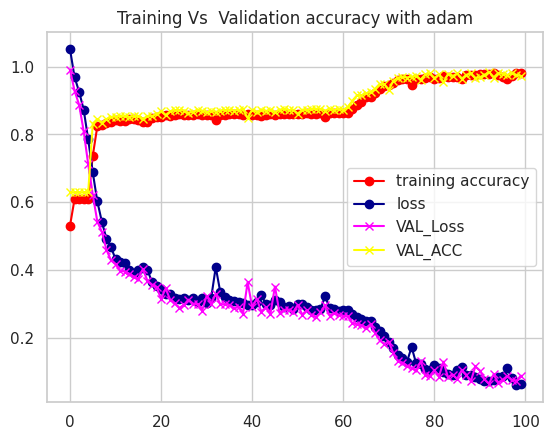

Epoch 1/75
122/122 [==============================] - 2s 5ms/step - loss: 1.0093 - accuracy: 0.6090 - val_loss: 0.9588 - val_accuracy: 0.6293
Epoch 2/75
122/122 [==============================] - 0s 2ms/step - loss: 0.9506 - accuracy: 0.6090 - val_loss: 0.9164 - val_accuracy: 0.6293
Epoch 3/75
122/122 [==============================] - 0s 2ms/step - loss: 0.9302 - accuracy: 0.6090 - val_loss: 0.9031 - val_accuracy: 0.6293
Epoch 4/75
122/122 [==============================] - 0s 2ms/step - loss: 0.9245 - accuracy: 0.6090 - val_loss: 0.8985 - val_accuracy: 0.6293
Epoch 5/75
122/122 [==============================] - 0s 3ms/step - loss: 0.9225 - accuracy: 0.6090 - val_loss: 0.8960 - val_accuracy: 0.6293
Epoch 6/75
122/122 [==============================] - 0s 3ms/step - loss: 0.9202 - accuracy: 0.6090 - val_loss: 0.8915 - val_accuracy: 0.6293
Epoch 7/75
122/122 [==============================] - 0s 3ms/step - loss: 0.9139 - accuracy: 0.6090 - val_loss: 0.8810 - val_accuracy: 0.6293
Epoch 

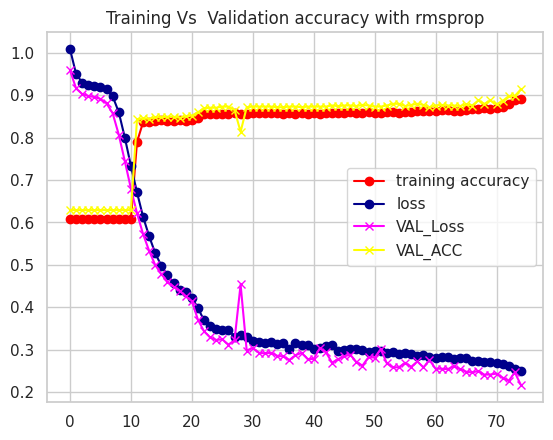

In [ ]:
X = data[['Tetracycline', 'Penicillin', 'azm_mic','log2_tet_mic', 'log2_pen_mic',
          'tet_mic', 'pen_mic', 'Beta.lactamase', 'Azithromycin', 'cip_mic',
          'log2_azm_mic', 'log2_cip_mic', 'Ciprofloxacin']]

Y =pd.get_dummies(data['pen_sr'])
x_Train,x_Test,y_Train,y_Test=train_test_split(X,Y,test_size=0.2)

models=Sequential()
models.add(Dense(units=X.shape[1],input_dim=X.shape[1],activation=keras.activations.relu))
models.add(Dense(units=X.shape[1],activation=keras.activations.tanh))
models.add(Dense(units=X.shape[1],activation=keras.activations.sigmoid))
models.add(Dense(units=X.shape[1],activation=keras.activations.softmax))
models.add(Dense(units=X.shape[1],activation=keras.activations.softmax))
models.add(Dense(units=Y.shape[1],activation=keras.activations.softmax))
models.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics='accuracy')
histo=models.fit(x_Train,y_Train,batch_size=25,epochs=100,validation_data=(x_Test,y_Test),validation_batch_size=35)
plt.plot(histo.history['accuracy'], label='training accuracy', marker='o', color='red')
plt.plot(histo.history['loss'], label='loss', marker='o', color='darkblue')
plt.plot(histo.history['val_loss'],label="VAL_Loss",marker='x',color='magenta')
plt.plot(histo.history['val_accuracy'],label="VAL_ACC",marker='x',color='yellow')
plt.title('Training Vs  Validation accuracy with adam')
plt.legend()
plt.show()

models1=Sequential()
models1.add(Dense(units=X.shape[1],input_dim=X.shape[1],activation=keras.activations.relu))
models1.add(Dense(units=X.shape[1],activation=keras.activations.tanh))
models1.add(Dense(units=X.shape[1],activation=keras.activations.sigmoid))
models1.add(Dense(units=X.shape[1],activation=keras.activations.softmax))
models1.add(Dense(units=X.shape[1],activation=keras.activations.softmax))
models1.add(Dense(units=Y.shape[1],activation=keras.activations.softmax))
models1.compile(optimizer='rmsprop',loss=keras.losses.categorical_crossentropy,metrics='accuracy')
hist=models1.fit(x_Train,y_Train,batch_size=25,epochs=75,validation_data=(x_Test,y_Test),validation_batch_size=35)
plt.plot(hist.history['accuracy'], label='training accuracy', marker='o', color='red')
plt.plot(hist.history['loss'], label='loss', marker='o', color='darkblue')
plt.plot(hist.history['val_loss'],label="VAL_Loss",marker='x',color='magenta')
plt.plot(hist.history['val_accuracy'],label="VAL_ACC",marker='x',color='yellow')
plt.title('Training Vs  Validation accuracy with rmsprop')
plt.legend()
plt.show()
models.save('saved_model.h5')
models1.save('saved_model1.h5')

In [ ]:
X = data[['azm_mic','log2_azm_mic','azm_sr','Beta.lactamase', 'Azithromycin']]

Y =pd.get_dummies(data['pen_sr'])
x_Train,x_Test,y_Train,y_Test=train_test_split(X,Y,test_size=0.2)

models=Sequential()
models.add(Dense(units=X.shape[1],input_dim=X.shape[1],activation=keras.activations.relu))
models.add(Dense(units=X.shape[1],activation=keras.activations.tanh))
models.add(Dense(units=X.shape[1],activation=keras.activations.sigmoid))
models.add(Dense(units=X.shape[1],activation=keras.activations.softmax))
models.add(Dense(units=X.shape[1],activation=keras.activations.softmax))
models.add(Dense(units=Y.shape[1],activation=keras.activations.softmax))
models.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics='accuracy')
histo=models.fit(x_Train,y_Train,batch_size=25,epochs=100,validation_data=(x_Test,y_Test),validation_batch_size=25)

final_val_accuracy = histo.history['val_accuracy'][-1]
eff_azm=final_val_accuracy
print("Efficacy of Azithromycin is = ", final_val_accuracy)

Epoch 1/100
122/122 [==============================] - 2s 4ms/step - loss: 1.0771 - accuracy: 0.4465 - val_loss: 1.0116 - val_accuracy: 0.6266
Epoch 2/100
122/122 [==============================] - 1s 4ms/step - loss: 0.9829 - accuracy: 0.6096 - val_loss: 0.9421 - val_accuracy: 0.6266
Epoch 3/100
122/122 [==============================] - 0s 4ms/step - loss: 0.9418 - accuracy: 0.6096 - val_loss: 0.9124 - val_accuracy: 0.6266
Epoch 4/100
122/122 [==============================] - 1s 4ms/step - loss: 0.9278 - accuracy: 0.6096 - val_loss: 0.9022 - val_accuracy: 0.6266
Epoch 5/100
122/122 [==============================] - 1s 5ms/step - loss: 0.9237 - accuracy: 0.6096 - val_loss: 0.8984 - val_accuracy: 0.6266
Epoch 6/100
122/122 [==============================] - 0s 4ms/step - loss: 0.9229 - accuracy: 0.6096 - val_loss: 0.8975 - val_accuracy: 0.6266
Epoch 7/100
122/122 [==============================] - 0s 3ms/step - loss: 0.9229 - accuracy: 0.6096 - val_loss: 0.8975 - val_accuracy: 0.6266

In [ ]:
X = data[['cip_mic','log2_cip_mic','cip_sr','Beta.lactamase', 'Ciprofloxacin']]

Y =pd.get_dummies(data['pen_sr'])
x_Train,x_Test,y_Train,y_Test=train_test_split(X,Y,test_size=0.5)

models=Sequential()
models.add(Dense(units=X.shape[1],input_dim=X.shape[1],activation=keras.activations.relu))
models.add(Dense(units=X.shape[1],activation=keras.activations.tanh))
models.add(Dense(units=X.shape[1],activation=keras.activations.sigmoid))
models.add(Dense(units=X.shape[1],activation=keras.activations.softmax))
models.add(Dense(units=X.shape[1],activation=keras.activations.softmax))
models.add(Dense(units=Y.shape[1],activation=keras.activations.softmax))
models.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics='accuracy')
histo=models.fit(x_Train,y_Train,batch_size=25,epochs=80,validation_data=(x_Test,y_Test),validation_batch_size=25)

final_val_accuracy = histo.history['val_accuracy'][-1]
eff_cip=final_val_accuracy

print("Efficacy of Ciprofloxacin is = ", final_val_accuracy)

Epoch 1/80
76/76 [==============================] - 5s 18ms/step - loss: 1.1171 - accuracy: 0.2821 - val_loss: 1.0543 - val_accuracy: 0.6133
Epoch 2/80
76/76 [==============================] - 1s 12ms/step - loss: 1.0116 - accuracy: 0.6128 - val_loss: 0.9732 - val_accuracy: 0.6133
Epoch 3/80
76/76 [==============================] - 1s 10ms/step - loss: 0.9528 - accuracy: 0.6128 - val_loss: 0.9369 - val_accuracy: 0.6133
Epoch 4/80
76/76 [==============================] - 1s 10ms/step - loss: 0.9299 - accuracy: 0.6128 - val_loss: 0.9238 - val_accuracy: 0.6133
Epoch 5/80
76/76 [==============================] - 0s 4ms/step - loss: 0.9215 - accuracy: 0.6128 - val_loss: 0.9182 - val_accuracy: 0.6133
Epoch 6/80
76/76 [==============================] - 0s 3ms/step - loss: 0.9178 - accuracy: 0.6128 - val_loss: 0.9156 - val_accuracy: 0.6133
Epoch 7/80
76/76 [==============================] - 0s 4ms/step - loss: 0.9152 - accuracy: 0.6128 - val_loss: 0.9133 - val_accuracy: 0.6133
Epoch 8/80
76/76

In [ ]:
X = data[['cro_mic','log2_cro_mic','cfx_sr','Beta.lactamase', 'Ceftriaxone']]
Y = pd.get_dummies(data['pen_sr'])
x_Train, x_Test, y_Train, y_Test = train_test_split(X, Y, test_size=0.2)

models = Sequential()
models.add(Dense(units=X.shape[1], input_dim=X.shape[1], activation=keras.activations.relu))
models.add(Dense(units=X.shape[1], activation=keras.activations.tanh))
models.add(Dense(units=X.shape[1], activation=keras.activations.sigmoid))
models.add(Dense(units=X.shape[1], activation=keras.activations.softmax))
models.add(Dense(units=X.shape[1], activation=keras.activations.softmax))
models.add(Dense(units=Y.shape[1], activation=keras.activations.softmax))
models.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])  # Specify metrics as 'accuracy'
histo = models.fit(x_Train, y_Train, batch_size=25, epochs=118, validation_data=(x_Test, y_Test), validation_batch_size=25)

final_val_accuracy = histo.history['val_accuracy'][-1]
eff_cro=final_val_accuracy

print("Efficacy of Ceftriaxone is = ", final_val_accuracy)

Epoch 1/118
122/122 [==============================] - 2s 4ms/step - loss: 0.9798 - accuracy: 0.6100 - val_loss: 0.9414 - val_accuracy: 0.6253
Epoch 2/118
122/122 [==============================] - 0s 3ms/step - loss: 0.9393 - accuracy: 0.6100 - val_loss: 0.9163 - val_accuracy: 0.6253
Epoch 3/118
122/122 [==============================] - 0s 3ms/step - loss: 0.9257 - accuracy: 0.6100 - val_loss: 0.9072 - val_accuracy: 0.6253
Epoch 4/118
122/122 [==============================] - 0s 3ms/step - loss: 0.9211 - accuracy: 0.6100 - val_loss: 0.9036 - val_accuracy: 0.6253
Epoch 5/118
122/122 [==============================] - 0s 3ms/step - loss: 0.9169 - accuracy: 0.6100 - val_loss: 0.8972 - val_accuracy: 0.6253
Epoch 6/118
122/122 [==============================] - 0s 3ms/step - loss: 0.9090 - accuracy: 0.6100 - val_loss: 0.8866 - val_accuracy: 0.6253
Epoch 7/118
122/122 [==============================] - 0s 3ms/step - loss: 0.8946 - accuracy: 0.6100 - val_loss: 0.8685 - val_accuracy: 0.6253

In [ ]:
X = data[['cfx_mic','log2_cfx_mic','cfx_sr','Beta.lactamase', 'Cefixime']]
Y = pd.get_dummies(data['pen_sr'])
x_Train, x_Test, y_Train, y_Test = train_test_split(X, Y, test_size=0.2)

models = Sequential()
models.add(Dense(units=X.shape[1], input_dim=X.shape[1], activation=keras.activations.relu))
models.add(Dense(units=X.shape[1], activation=keras.activations.tanh))
models.add(Dense(units=X.shape[1], activation=keras.activations.sigmoid))
models.add(Dense(units=X.shape[1], activation=keras.activations.softmax))
models.add(Dense(units=X.shape[1], activation=keras.activations.softmax))
models.add(Dense(units=Y.shape[1], activation=keras.activations.softmax))
models.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])  # Specify metrics as 'accuracy'
histo = models.fit(x_Train, y_Train, batch_size=25, epochs=80, validation_data=(x_Test, y_Test), validation_batch_size=25)

final_val_accuracy = histo.history['val_accuracy'][-1]
eff_cfx=final_val_accuracy

print("Efficacy of Cefixime is = ", final_val_accuracy)

Epoch 1/80
122/122 [==============================] - 2s 4ms/step - loss: 1.0311 - accuracy: 0.4835 - val_loss: 0.9662 - val_accuracy: 0.6293
Epoch 2/80
122/122 [==============================] - 0s 3ms/step - loss: 0.9526 - accuracy: 0.6090 - val_loss: 0.9156 - val_accuracy: 0.6293
Epoch 3/80
122/122 [==============================] - 0s 3ms/step - loss: 0.9287 - accuracy: 0.6090 - val_loss: 0.9011 - val_accuracy: 0.6293
Epoch 4/80
122/122 [==============================] - 1s 4ms/step - loss: 0.9210 - accuracy: 0.6090 - val_loss: 0.8933 - val_accuracy: 0.6293
Epoch 5/80
122/122 [==============================] - 1s 4ms/step - loss: 0.9145 - accuracy: 0.6090 - val_loss: 0.8851 - val_accuracy: 0.6293
Epoch 6/80
122/122 [==============================] - 0s 4ms/step - loss: 0.9035 - accuracy: 0.6090 - val_loss: 0.8812 - val_accuracy: 0.6293
Epoch 7/80
122/122 [==============================] - 1s 5ms/step - loss: 0.8916 - accuracy: 0.6090 - val_loss: 0.8658 - val_accuracy: 0.6293
Epoch 

In [ ]:
X = data[['tet_mic','log2_tet_mic','tet_sr','Beta.lactamase', 'Tetracycline']]
Y = pd.get_dummies(data['pen_sr'])
x_Train, x_Test, y_Train, y_Test = train_test_split(X, Y, test_size=0.4)

models = Sequential()
models.add(Dense(units=X.shape[1], input_dim=X.shape[1], activation=keras.activations.relu))
models.add(Dense(units=X.shape[1], activation=keras.activations.tanh))
models.add(Dense(units=X.shape[1], activation=keras.activations.sigmoid))
models.add(Dense(units=X.shape[1], activation=keras.activations.softmax))
models.add(Dense(units=X.shape[1], activation=keras.activations.softmax))
models.add(Dense(units=Y.shape[1], activation=keras.activations.softmax))
models.compile(optimizer='rmsprop', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
histo = models.fit(x_Train, y_Train, batch_size=20, epochs=80, validation_data=(x_Test, y_Test), validation_batch_size=25)

final_val_accuracy = histo.history['val_accuracy'][-1]
eff_tet=final_val_accuracy

print("Efficacy of Tetracycline is = ", final_val_accuracy)

Epoch 1/80
114/114 [==============================] - 2s 8ms/step - loss: 1.0887 - accuracy: 0.3703 - val_loss: 1.0352 - val_accuracy: 0.6119
Epoch 2/80
114/114 [==============================] - 1s 6ms/step - loss: 0.9978 - accuracy: 0.6138 - val_loss: 0.9682 - val_accuracy: 0.6119
Epoch 3/80
114/114 [==============================] - 1s 6ms/step - loss: 0.9492 - accuracy: 0.6138 - val_loss: 0.9373 - val_accuracy: 0.6119
Epoch 4/80
114/114 [==============================] - 1s 7ms/step - loss: 0.9265 - accuracy: 0.6138 - val_loss: 0.9247 - val_accuracy: 0.6119
Epoch 5/80
114/114 [==============================] - 1s 10ms/step - loss: 0.9182 - accuracy: 0.6138 - val_loss: 0.9209 - val_accuracy: 0.6119
Epoch 6/80
114/114 [==============================] - 2s 15ms/step - loss: 0.9149 - accuracy: 0.6138 - val_loss: 0.9192 - val_accuracy: 0.6119
Epoch 7/80
114/114 [==============================] - 0s 3ms/step - loss: 0.9128 - accuracy: 0.6138 - val_loss: 0.9173 - val_accuracy: 0.6119
Epoc

In [ ]:
acc_list=np.array((eff_azm,eff_cip,eff_cro,eff_cfx,eff_tet))
desc_sort=np.sort(acc_list)[::-1]
print(desc_sort)

[0.85874587 0.76121372 0.74802113 0.70844328 0.68832541]


In [ ]:
labels = ['Tetracycline', 'Cefixime','Ceftriaxone','Azithromycin','Ciprofloxacin']
sorted_dict = {label: value for label, value in zip(labels, desc_sort)}

print("Drugs sorted in descending order of their efficay based on the used dataset;")
print()
for key, value in sorted_dict.items():
    print(f'{key}: {value*100}')


Drugs sorted in descending order of their efficay based on the used dataset;

Tetracycline: 85.87458729743958
Cefixime: 76.12137198448181
Ceftriaxone: 74.8021125793457
Azithromycin: 70.8443284034729
Ciprofloxacin: 68.83254051208496
